In [9]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


## 데이터셋 준비

In [16]:
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)
sn = X_train.shape[0]
wd = X_train.shape[1]
he = X_train.shape[2]
type(X_train)

(60000, 28, 28)


numpy.ndarray

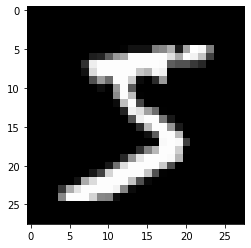

In [3]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

### 데이터 변환

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

### 원 핫 인코딩

In [5]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2, validation_split =0.2 )


Epoch 1/10
375/375 - 6s - loss: 1.1300 - accuracy: 0.7146 - val_loss: 0.6404 - val_accuracy: 0.8547
Epoch 2/10
375/375 - 1s - loss: 0.5744 - accuracy: 0.8580 - val_loss: 0.4700 - val_accuracy: 0.8842
Epoch 3/10
375/375 - 1s - loss: 0.4682 - accuracy: 0.8760 - val_loss: 0.4083 - val_accuracy: 0.8925
Epoch 4/10
375/375 - 1s - loss: 0.4204 - accuracy: 0.8856 - val_loss: 0.3762 - val_accuracy: 0.8991
Epoch 5/10
375/375 - 1s - loss: 0.3922 - accuracy: 0.8917 - val_loss: 0.3556 - val_accuracy: 0.9029
Epoch 6/10
375/375 - 1s - loss: 0.3729 - accuracy: 0.8965 - val_loss: 0.3413 - val_accuracy: 0.9052
Epoch 7/10
375/375 - 2s - loss: 0.3590 - accuracy: 0.8993 - val_loss: 0.3305 - val_accuracy: 0.9086
Epoch 8/10
375/375 - 2s - loss: 0.3480 - accuracy: 0.9021 - val_loss: 0.3222 - val_accuracy: 0.9103
Epoch 9/10
375/375 - 1s - loss: 0.3391 - accuracy: 0.9044 - val_loss: 0.3152 - val_accuracy: 0.9123
Epoch 10/10
375/375 - 1s - loss: 0.3317 - accuracy: 0.9067 - val_loss: 0.3091 - val_accuracy: 0.9141

In [8]:
test_loss, test_acc = model.evaluate(X_test,Y_test)
print("Test Acc : ", test_acc)
print("Test loss : ", test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.9129
Test Acc :  0.9128999710083008
Test loss :  0.30973270535469055
